# <center> <u>Association Rules for Movie data Solution</u>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# Import Dataset
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


## EDA:

In [4]:
movie.shape

(10, 15)

In [16]:
movie.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [9]:
movie.fillna(0, inplace = True)

In [11]:
movie['V1'].value_counts()

Gladiator        6
Sixth Sense      2
LOTR1            1
Harry Potter1    1
Name: V1, dtype: int64

In [12]:
movie['V2'].value_counts()

Patriot          6
LOTR1            1
LOTR2            1
Harry Potter2    1
LOTR             1
Name: V2, dtype: int64

In [13]:
movie['V3'].value_counts()

Sixth Sense      4
0                3
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

In [14]:
movie['V4'].value_counts()

0             8
Green Mile    2
Name: V4, dtype: int64

In [15]:
movie['V5'].value_counts()

0        9
LOTR2    1
Name: V5, dtype: int64

In [18]:
movie = pd.get_dummies(movie, columns = ['V1', 'V2', 'V3', 'V4', 'V5'] )

In [19]:
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
5,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
8,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
9,1,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,1,0


# Apriori Algorithm

## 1. Association rules with 10% Support and 70% confidence

In [21]:
# with 10% support
frequent_itemsets=apriori(movie,min_support=0.1,use_colnames=True)
frequent_itemsets

C:\Users\Anjali Chawda\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
2254,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."
2255,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."
2256,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, V3..."
2257,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."


In [22]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
91939,(V2_LOTR1),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91940,(V5_LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91941,(Sixth Sense),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
91942,(LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [23]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
91939,(V2_LOTR1),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91940,(V5_LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91941,(Sixth Sense),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
91942,(LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


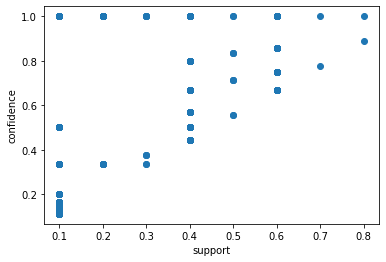

In [24]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## 2. Association rules with 5% Support and 90% confidence

In [26]:
# with 5% support
frequent_itemsets2=apriori(movie,min_support=0.05,use_colnames=True)
frequent_itemsets2

C:\Users\Anjali Chawda\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
2254,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."
2255,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."
2256,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, V3..."
2257,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."


In [27]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
91871,(V2_LOTR1),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91872,(V5_LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91873,(Sixth Sense),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
91874,(LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [28]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
91871,(V2_LOTR1),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91872,(V5_LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91873,(Sixth Sense),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
91874,(LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


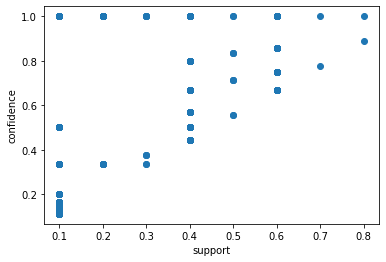

In [29]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## 3. Association rules with 5% Support and 80% confidence

In [30]:
# With 5% Support
frequent_itemsets3=apriori(movie,min_support=0.05,use_colnames=True)
frequent_itemsets3

C:\Users\Anjali Chawda\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
2254,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."
2255,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."
2256,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, V3..."
2257,0.1,"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO..."


In [31]:
# With 80% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
91883,(V2_LOTR1),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91884,(V5_LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91885,(Sixth Sense),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
91886,(LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [32]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
91883,(V2_LOTR1),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91884,(V5_LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
91885,(Sixth Sense),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
91886,(LOTR2),"(V4_Green Mile, V1_Sixth Sense, Green Mile, LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


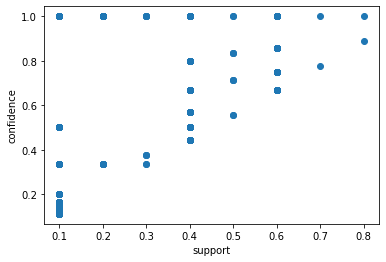

In [33]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()